In [11]:
import sys
sys.path.append('../scripts/')
from puddle_world import *
import itertools
%matplotlib widget

In [12]:
class PolicyEvaluator:

    def __init__(self, widths, goal, lowerleft=np.array([-4, -4]).T, upperright=np.array([4, 4]).T):
        self.pose_min = np.r_[lowerleft, 0]
        self.pose_max = np.r_[upperright, math.pi*2]
        self.widths = widths
        self.goal = goal

        self.index_nums = ((self.pose_max - self.pose_min) /
                           self.widths).astype(int)
        nx, ny, nt = self.index_nums
        self.indexes = list(itertools.product(
            range(nx), range(ny), range(nt)))

        self.value_function, self.final_state_flags = self.init_value_function()  # 追加

    def init_value_function(self):
        v = np.empty(self.index_nums)
        f = np.zeros(self.index_nums)

        for index in self.indexes:
            f[index] = self.final_state(np.array(index).T)
            v[index] = self.goal.value if f[index] else -100.0

        return v, f

    def final_state(self, index):
        x_min, y_min, _ = self.pose_min + self.widths*index
        x_max, y_max, _ = self.pose_min + self.widths * (index + 1)

        corners = [[x_min, y_min, _], [x_min, y_max, _], [
            x_max, y_min, _], [x_max, y_max, _]]
        return all([self.goal.inside(np.array(c).T) for c in corners ])

In [13]:
pe = PolicyEvaluator(np.array([0.2, 0.2, math.pi/18]).T, Goal(-3, -3))

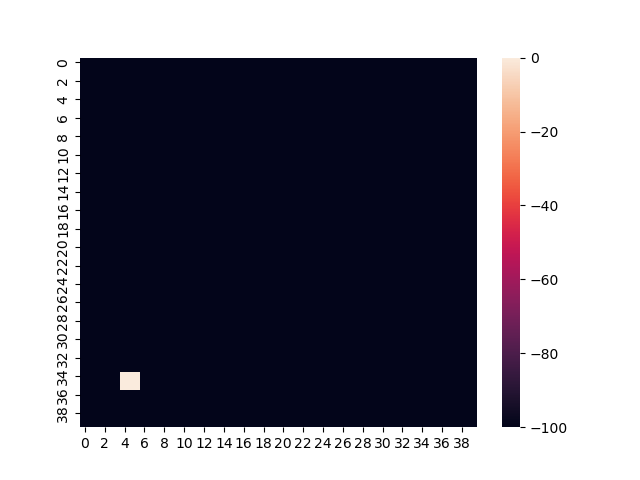

In [14]:
import seaborn as sns

v = pe.value_function[:, :, 0]

sns.heatmap(np.rot90(v), square=False)
plt.show()

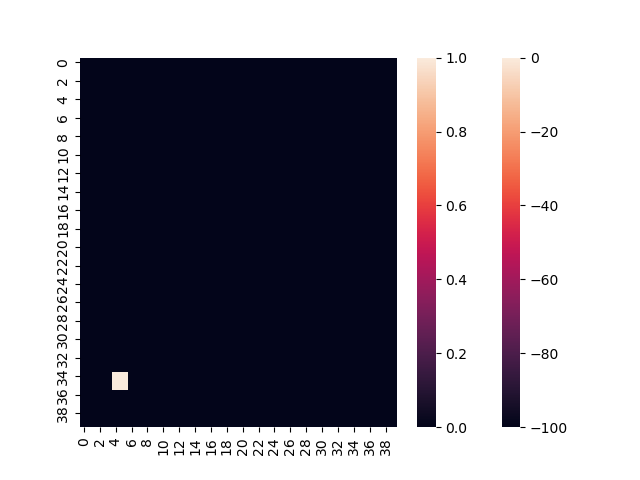

In [15]:
f = pe.final_state_flags[:, :, 0]
sns.heatmap(np.rot90(f), square=False)
plt.show()